In [1]:
import geopandas as gpd

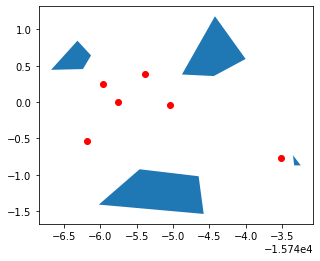

In [2]:
points = gpd.read_file('points.shp')
polygons = gpd.read_file('polygons.shp')

ax = polygons.plot();
points.plot(color = 'red', ax = ax);

In [3]:
# change polygons to the shapefiles of choice
# the ['distance_to_point'] and ['distance_to_point_centroid'] can be changed to whatever you think is reasonable name

polygons['distance_to_point'] = polygons.geometry.apply(lambda x: points.distance(x).min())
polygons['distance_to_point_centroid'] = polygons.centroid.geometry.apply(lambda x: points.distance(x).min())

polygons

,id,type,geometry,distance_to_point,distance_to_point_centroid
0,1,a,"POLYGON ((-15746.316 0.845, -15746.129 0.642, ...",0.340219,0.527510
1,2,a,"POLYGON ((-15745.460 -0.925, -15744.647 -1.022...",0.768062,1.218866
2,3,b,"POLYGON ((-15744.422 1.182, -15744.000 0.594, ...",0.447045,0.934239
3,4,a,"POLYGON ((-15743.347 -0.733, -15743.240 -0.872...",0.164327,0.207585


Check Coordinate system

In [5]:
polygons.crs

<Projected CRS: EPSG:3007>
Name: SWEREF99 12 00
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - 12 00
- bounds: (10.93, 56.74, 13.11, 60.13)
Coordinate Operation:
- name: SWEREF99 12 00
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
points.crs

<Projected CRS: EPSG:3007>
Name: SWEREF99 12 00
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - 12 00
- bounds: (10.93, 56.74, 13.11, 60.13)
Coordinate Operation:
- name: SWEREF99 12 00
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
polygons.crs == points.crs

True

In [22]:
polygons = polygons.to_crs('EPSG:3395')
polygons.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
polygons.crs == points.crs

False

In [20]:
polygons.crs = points.crs
polygons.crs

<Projected CRS: EPSG:3007>
Name: SWEREF99 12 00
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - 12 00
- bounds: (10.93, 56.74, 13.11, 60.13)
Coordinate Operation:
- name: SWEREF99 12 00
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
polygons.crs == points.crs

True